# Is there a relationship between labels scores and genres? One tailed test
H<sub>0</sub>: The label with the most genre diversity will not have higher scores than the label with least genre diversity

In [1]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np

db_path = 'postgres:///music'
engine = create_engine(db_path)

table_names = engine.table_names()

table_names

['reviews', 'artists', 'genres', 'labels', 'years', 'content']

In [2]:
def postgres_to_df(table):
    engine = create_engine(db_path)
    conn = engine.connect()
    result = conn.execute(f'''
    SELECT * FROM {table}''')
    columns = [x for x in result.keys()]
    df = pd.DataFrame(result.fetchall(),columns=columns)
    return df

In [3]:
postgres_to_df('reviews')

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017
3,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017
4,22725,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017
5,22722,insecure (music from the hbo original series),various artists,http://pitchfork.com/reviews/albums/22722-inse...,7.4,0,vanessa okoth-obbo,contributor,2017-01-05,3,5,1,2017
6,22704,stillness in wonderland,little simz,http://pitchfork.com/reviews/albums/22704-litt...,7.1,0,katherine st. asaph,contributor,2017-01-05,3,5,1,2017
7,22694,tehillim,yotam avni,http://pitchfork.com/reviews/albums/22694-tehi...,7.0,0,andy beta,contributor,2017-01-05,3,5,1,2017
8,22714,reflection,brian eno,http://pitchfork.com/reviews/albums/22714-refl...,7.7,0,andy beta,contributor,2017-01-04,2,4,1,2017
9,22724,filthy america its beautiful,the lox,http://pitchfork.com/reviews/albums/22724-filt...,5.3,0,ian cohen,contributor,2017-01-04,2,4,1,2017


In [5]:
engine = create_engine(db_path)
conn = engine.connect()
result = conn.execute(f'''
SELECT * FROM reviews 
    JOIN genres ON reviews.reviewid=genres.reviewid
    JOIN labels ON reviews.reviewid=labels.reviewid''')
columns = [x for x in result.keys()]
df = pd.DataFrame(result.fetchall(),columns=columns)

In [6]:
df.head()

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,reviewid,genre,reviewid,label
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017,22703,electronic,22703,virgin
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017,22721,metal,22721,hathenter
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,22659,rock,22659,fashionable idiots
3,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,22659,rock,22659,static shock
4,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017,22661,rock,22661,mississippi


In [13]:
result = conn.execute('''
    SELECT COUNT(genre) as genrecounts, label, AVG(score) FROM reviews
        JOIN genres ON reviews.reviewid=genres.reviewid
        JOIN labels ON reviews.reviewid=labels.reviewid
        GROUP BY label''')

columns = [x for x in result.keys()]
df = pd.DataFrame(result.fetchall(),columns=columns)

In [23]:
df.sort_values(by='genrecounts', ascending=False)


,genrecounts,label,avg
3428,419,self-released,6.943789
243,318,sub pop,7.103561
2899,278,domino,7.349648
3654,268,thrill jockey,7.004375
2495,267,merge,7.270909
982,248,drag city,7.158804
2555,233,warp,7.081590
3619,232,columbia,6.811157
1869,232,mute,7.011667
3243,216,matador,7.367100


In [24]:
engine = create_engine(db_path)
conn = engine.connect()
result = conn.execute(f'''
SELECT * FROM reviews 
    JOIN genres ON reviews.reviewid=genres.reviewid
    JOIN labels ON reviews.reviewid=labels.reviewid''')
columns = [x for x in result.keys()]
df = pd.DataFrame(result.fetchall(),columns=columns)

In [30]:
np.random.seed(1)
sample_sub_pop = np.random.choice(df[df['label'] == 'sub pop']['score'], size=200)
sample_sub_pop

array([8.2, 9.2, 6.8, 7.8, 7.3, 6.5, 7.4, 7.9, 8.8, 8.3, 7.1, 6.5, 7.4,
       8.5, 7.8, 6.7, 7.4, 6. , 7. , 6.8, 7.1, 5.5, 5.1, 6.8, 7.1, 6.8,
       6.7, 3.1, 7.3, 7.7, 6.8, 6.5, 6.8, 5.1, 7.5, 7.9, 7.3, 8.3, 7.4,
       3.1, 6.8, 8. , 7.6, 7.8, 8.7, 8. , 7.4, 8.1, 7.3, 9.3, 7.4, 8.7,
       8.8, 8.8, 6.5, 6.3, 7.5, 6.7, 8.6, 7.8, 7.9, 8. , 9. , 3.1, 7.3,
       8. , 7.5, 5.2, 8. , 8. , 7.9, 8.4, 5.7, 6.5, 7.8, 7.9, 7.6, 6.6,
       6.8, 6.5, 9.2, 0.2, 8.1, 7.9, 8. , 7.8, 6.7, 5.3, 7.8, 6.1, 7.3,
       6.5, 7.7, 7.2, 6. , 6.4, 7.6, 6.4, 7.3, 7.2, 6.5, 8.4, 6.3, 6.3,
       6.8, 6.5, 5.4, 7.5, 8. , 6.3, 6.2, 7.8, 8.5, 7.8, 8.8, 6.6, 6.3,
       6.9, 8.5, 8. , 8. , 9.2, 7.7, 8.3, 7.5, 7.7, 7.4, 9.3, 8. , 6.4,
       7.2, 7.5, 7.5, 6.5, 5.6, 7.5, 6.5, 9.2, 6.8, 6.3, 8.2, 5.9, 6.5,
       8.8, 5.1, 6.6, 8.8, 5.9, 6.5, 6.3, 7.7, 6.8, 5.6, 8.6, 7.8, 6. ,
       5.5, 4.3, 7.3, 7.7, 7.5, 5.3, 6.4, 7.5, 7.9, 7.6, 7.5, 7.5, 6.6,
       7.4, 6.4, 6.4, 7.2, 6.9, 7.3, 6. , 7.8, 5.2, 8. , 7.4, 7.

In [31]:
result = conn.execute('''
    SELECT COUNT(genre) as genrecounts, label, AVG(score) FROM reviews
        JOIN genres ON reviews.reviewid=genres.reviewid
        JOIN labels ON reviews.reviewid=labels.reviewid
        GROUP BY label''')

columns = [x for x in result.keys()]
df = pd.DataFrame(result.fetchall(),columns=columns)

In [37]:
np.random.seed(1)
sample_one_genre = np.random.choice(df[df['genrecounts']==1]['avg'], size=200)

sample_one_genre

array([ 7.80000019,  6.9000001 ,  7.79999995,  8.60000038,  8.23333343,
        6.5       ,  7.5999999 ,  7.        ,  5.0999999 ,  7.19999981,
        7.19999981,  6.80000019,  6.69999981,  6.69999981,  7.80000019,
        7.5999999 ,  6.9000001 ,  7.19999981,  5.        ,  6.        ,
        7.80000019,  5.9000001 ,  7.30000019,  7.9000001 ,  8.39999962,
        7.5999999 ,  7.19999981,  7.0999999 ,  6.5999999 ,  7.5       ,
        6.30000019,  7.69999981,  7.45000005,  8.10000038,  6.        ,
        6.4000001 ,  7.30000019,  8.10000038,  7.30000019,  3.79999995,
        7.45000005,  7.4000001 ,  6.30000019,  7.9000001 ,  7.45000005,
        5.80000019,  9.        ,  7.4000001 ,  8.39999962,  6.80000019,
        7.80000019,  6.69999981,  8.        ,  7.69999981,  7.4000001 ,
        6.4000001 ,  2.70000005,  7.75      ,  6.69999981,  7.4000001 ,
        8.4000001 ,  7.4000001 ,  7.5       ,  8.10000038,  5.80000019,
        6.9000001 ,  9.5       ,  5.        ,  7.5       ,  7.40

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


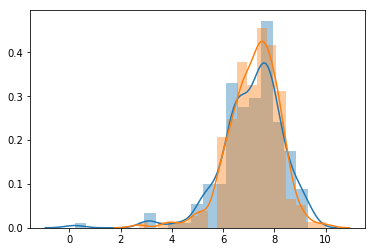

In [39]:
import seaborn as sns
%matplotlib inline
sns.distplot(sample_sub_pop)
sns.distplot(sample_one_genre)

In [40]:
from scipy import stats

stats.ttest_ind(sample_sub_pop, sample_one_genre)

Ttest_indResult(statistic=-0.6794032851439787, pvalue=0.49727729377798247)

# Conclusion: 
Since our p-value is above the threshold of .05, we fail to reject the null hypothesis in favor of the alternative hypothesis. This means that the label with the most genre diversity will not have significantly higher scores than the labels with the least genre diversity.

In [44]:
sample_size = 200
sub_pop_mean = np.mean(sample_sub_pop)
sub_pop_sd = np.std(sample_sub_pop)
one_genre_mean = np.mean(sample_one_genre)
one_genre_sd = np.std(sample_one_genre)

n_sim = 1000

np.random.seed(1)
p = np.empty(n_sim)
p.fill(np.nan)

for x in range(n_sim):
    sub_pop = np.random.normal(loc=sub_pop_mean, scale=sub_pop_sd, size=sample_size)
    one_genre = np.random.normal(loc=one_genre_mean, scale=one_genre_sd, size=sample_size)
    t_test = stats.ttest_ind(sub_pop, one_genre)
    p[x] = t_test[1]
    
num_null_rejects = np.sum(p < .05)
reject_proportion = num_null_rejects / n_sim
reject_proportion
    

0.104

If a large effect is truly present between the sample of most artists label and the sample of least artists labels groups, then the null hypothesis (i.e. no difference with alpha 0.05) would be rejected 10.4% of times. This confirms that the label with the most genres does not generate scores significantly different from the labels with one genre.